In [1]:

#this allows relative imports in notebook
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
from UCLSE.environment import Market_session, yamlLoad
import pandas as pd
from UCLSE.plotting_utilities import bid_ask_window,demand_curve_intersect, bid_ask_last_plot


%matplotlib inline

# Market_session

The Market_session class is the coordinator between traders, exchange and supply_demand modules. It sets up the experiment, runs it and records the information.

In [2]:
pa=module_path
config_name='UCLSE\\test\\fixtures\\mkt_cfg.yml'
config_path=os.path.join(pa,config_name)

environ_dic=yamlLoad(config_path)
environ_dic['trade_file']='avg_balance.csv'
environ_dic['trade_record']= 'transactions.csv'

The instantiation of the class requires multiple parameters. Most of them are recognisable from the previous tutorial on the supply_demand class. The new elements here include the buyers spec where the population of trading agents is defined.

In [3]:

environ_dic={
'start_time': 0.0,
 'end_time': 600.0, #how long the experiment goes on for
 'supply_price_low': 95,
 'supply_price_high': 95,
 'demand_price_low': 105,
 'demand_price_high': 105,
 'interval': 30,
 'timemode': 'drip-poisson',
 'buyers_spec': {'GVWY': 10, 'SHVR': 10, 'ZIC': 10, 'ZIP': 10}, #how many of each type of trader we want
 'sellers_spec': {'GVWY': 10, 'SHVR': 10, 'ZIC': 10, 'ZIP': 10},
 'verbose': False,
 'trade_file': 'avg_balance.csv', #profit and loss summary by trader type
 'trade_record': 'transactions.csv', #list of all transactions
 'dump_each_trade': True} #record each trade

Define Market_session object

In [4]:
sess=Market_session(**environ_dic)

It has an associated exchange

In [5]:
sess.exchange

No orders in exchange order book

Associated traders

In [6]:
sess.traders

{'B00': [TID: B00 type: GVWY balance: 0.0 blotter: Empty DataFrame
 Columns: []
 Index: [] orders: OrderedDict() n_trades: 0 profitpertime: 0],
 'B01': [TID: B01 type: GVWY balance: 0.0 blotter: Empty DataFrame
 Columns: []
 Index: [] orders: OrderedDict() n_trades: 0 profitpertime: 0],
 'B02': [TID: B02 type: GVWY balance: 0.0 blotter: Empty DataFrame
 Columns: []
 Index: [] orders: OrderedDict() n_trades: 0 profitpertime: 0],
 'B03': [TID: B03 type: GVWY balance: 0.0 blotter: Empty DataFrame
 Columns: []
 Index: [] orders: OrderedDict() n_trades: 0 profitpertime: 0],
 'B04': [TID: B04 type: GVWY balance: 0.0 blotter: Empty DataFrame
 Columns: []
 Index: [] orders: OrderedDict() n_trades: 0 profitpertime: 0],
 'B05': [TID: B05 type: GVWY balance: 0.0 blotter: Empty DataFrame
 Columns: []
 Index: [] orders: OrderedDict() n_trades: 0 profitpertime: 0],
 'B06': [TID: B06 type: GVWY balance: 0.0 blotter: Empty DataFrame
 Columns: []
 Index: [] orders: OrderedDict() n_trades: 0 profitperti

and associated supply and demand

In [7]:
self=sess.sd
print(f"no. buyers: {self.n_buyers}, no.sellers: {self.n_sellers}, timemode: {self.timemode},  supply schedule: {self.supply_schedule}, demand schedule {self.demand_schedule}")

no. buyers: 40, no.sellers: 40, timemode: drip-poisson,  supply schedule: [{'from': 0.0, 'to': 600.0, 'stepmode': 'fixed', 'ranges': (95, 95, <function SupplyDemand.schedule_offsetfn at 0x000001D3724CA048>)}], demand schedule [{'from': 0.0, 'to': 600.0, 'stepmode': 'fixed', 'ranges': (105, 105, <function SupplyDemand.schedule_offsetfn at 0x000001D3724CA048>)}]


In [8]:
sess.sd

no. buyers: 40, no.sellers: 40, timemode: drip-poisson,  supply schedule: [{'from': 0.0, 'to': 600.0, 'stepmode': 'fixed', 'ranges': (95, 95, <function SupplyDemand.schedule_offsetfn at 0x000001D3724CA048>)}], demand schedule [{'from': 0.0, 'to': 600.0, 'stepmode': 'fixed', 'ranges': (105, 105, <function SupplyDemand.schedule_offsetfn at 0x000001D3724CA048>)}]

The principle method is simulate() which runs the experiment and will save the profit and loss of the traders in a csv as well as the transaction record.

In [9]:
sess.simulate(sess.trade_stats_df3,recording=True)

avg_balance.csv


All transactions are stored at the exchange. Cancels occur when traders are issued more orders than their limit (default 1); the old one is cancelled and replaced by the new one.

In [10]:
df=pd.DataFrame(sess.exchange.tape)
df

,oid,otype,p1_qid,p2_qid,party1,party2,price,qid,qty,tape_time,tid,time,type
0,-20.0,Bid,NaN,NaN,NaN,NaN,84.0,0.0,1,0.96,B18,0.96,New Order
1,-35.0,Bid,NaN,NaN,NaN,NaN,78.0,1.0,1,1.19,B33,1.19,New Order
2,-35.0,Bid,NaN,NaN,NaN,NaN,78.0,1.0,1,1.73,B33,1.19,Cancel
3,-35.0,Bid,NaN,NaN,NaN,NaN,78.0,2.0,1,1.73,B33,1.73,New Order
4,-16.0,Bid,NaN,NaN,NaN,NaN,85.0,3.0,1,1.76,B14,1.76,New Order
5,-29.0,Bid,NaN,NaN,NaN,NaN,87.0,4.0,1,1.80,B27,1.80,New Order
6,-29.0,Bid,NaN,NaN,NaN,NaN,87.0,4.0,1,1.81,B27,1.80,Cancel
7,-29.0,Bid,NaN,NaN,NaN,NaN,85.0,5.0,1,1.81,B27,1.81,New Order
8,-64.0,Ask,NaN,NaN,NaN,NaN,294.0,6.0,1,1.86,S22,1.86,New Order
9,-64.0,Ask,NaN,NaN,NaN,NaN,294.0,6.0,1,1.88,S22,1.86,Cancel


The state of the orderbook at the end of the period is:

In [11]:
print(sess.exchange)

                             tid     
otype                        Ask  Bid
price time   qid  oid   qty          
100.0 599.54 9590 -1547 1    NaN  B25
101.0 599.22 9583 -1550 1    NaN  B28
102.0 599.58 9592 -1543 1    NaN  B21
104.0 598.43 9571 -1552 1    NaN  B30
105.0 599.94 9601 -1559 1    NaN  B37
107.0 599.73 9598 -1557 1    NaN  B35
110.0 599.93 9600 -1555 1    NaN  B33
116.0 599.64 9595 -1532 1    NaN  B10
121.0 599.95 9602 -1556 1    NaN  B34
129.0 599.61 9594 -1596 1    S34  NaN
134.0 598.15 9567 -1571 1    S09  NaN
148.0 599.47 9589 -1575 1    S13  NaN
152.0 599.67 9596 -1600 1    S38  NaN
169.0 599.77 9599 -1485 1    S03  NaN
176.0 599.28 9586 -1591 1    S29  NaN


The recording=True flag records enough information from the experiment for it to be replayed exactly. When replaying all non-deterministic results are bypassed and replaced with their outputs from the first running of the experiment.  Originally this was to allow side by side testing when refactoring the code.

We can look at the list of orders sent to the traders through this method

In [12]:
df=sess.create_order_list(sess)
df.tail()

,tid,otype,price,qty,time,qid,oid,time_issued
time,,,,,,,,
1970-01-01 00:09:59.280,S38,Ask,151.0,1,599.28,None,-1600,599.29
1970-01-01 00:09:59.460,B09,Bid,162.0,1,599.46,None,-1531,599.47
1970-01-01 00:09:59.820,S32,Ask,153.0,1,599.82,None,-1594,599.83
1970-01-01 00:09:59.920,B12,Bid,164.0,1,599.92,None,-1534,599.93
1970-01-01 00:09:59.920,B36,Bid,164.0,1,599.92,None,-1558,599.93


We really want to know a bit more about these orders - when were they cancelled or completed if at all? We can get a fuller picture by examining the records of the individual traders. This method does not require the session to be recorded.

In [13]:
order_list=sess.make_order_list(sess)
order_list

,tid,otype,price,qty,qid,oid,status,completion_time
issue_time,,,,,,,,
1970-01-01 00:00:00.010,B33,Bid,105.0,1,NaN,-35,complete,1970-01-01 00:00:05.580
1970-01-01 00:00:00.710,B18,Bid,105.0,1,NaN,-20,complete,1970-01-01 00:00:03.690
1970-01-01 00:00:01.410,S38,Ask,95.0,1,NaN,-80,complete,1970-01-01 00:00:06.080
1970-01-01 00:00:01.410,B27,Bid,105.0,1,NaN,-29,complete,1970-01-01 00:00:09.010
1970-01-01 00:00:01.410,S20,Ask,95.0,1,NaN,-62,complete,1970-01-01 00:00:09.010
1970-01-01 00:00:01.410,S22,Ask,95.0,1,NaN,-64,complete,1970-01-01 00:00:03.690
1970-01-01 00:00:01.410,B14,Bid,105.0,1,NaN,-16,complete,1970-01-01 00:00:04.480
1970-01-01 00:00:01.410,S31,Ask,95.0,1,NaN,-73,complete,1970-01-01 00:00:05.770
1970-01-01 00:00:02.800,S26,Ask,95.0,1,NaN,-68,complete,1970-01-01 00:00:08.910


We can create supply and demand curves from the orders issued to traders as before, calculate their intersect and plot them. 

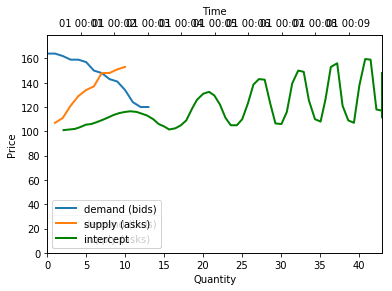

In [14]:
bids,asks,intersect=bid_ask_window(sess.sd,df,periods=30/sess.timer.step,step=10)
demand_curve_intersect(bids,asks,intersect,df,path='basic_animation.mp4',window='30s')

We can also use the replay vars to plot how the best bid ask evolved and where transactions were relative to the supply demand curve.

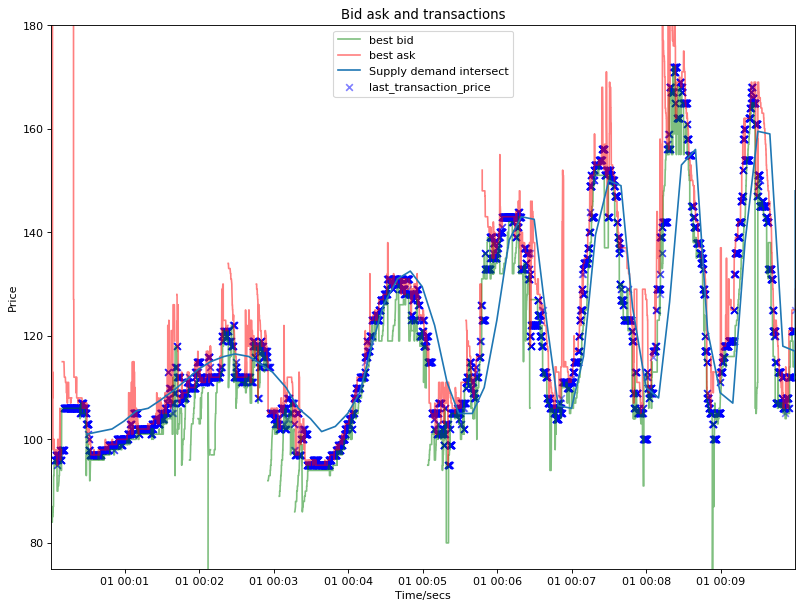

In [15]:
best_bid,best_ask,last_trans=sess.best_last(sess)
bid_ask_last_plot(best_bid,best_ask,last_trans,intersect)

In [16]:
order_list['waiting_time']=order_list.completion_time-order_list.index.values

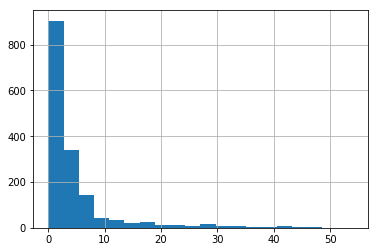

In [18]:
order_list['waiting_time'].astype('timedelta64[s]').hist(bins=20)